In [17]:
%run setup.py

In [18]:
sample = pd.read_csv('../data/joel_gaia_data.csv')

In [3]:
# sample = sample.loc[sample['numax']>50,:]

0

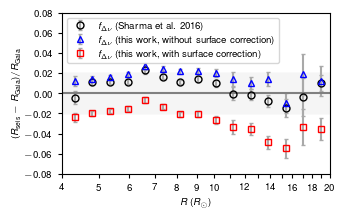

In [19]:
fig, axes = plt.subplots(figsize=mnras_size(column='one'), nrows=1, ncols=1, squeeze=False, constrained_layout=True)
axes = axes.reshape(-1)

# (Rseis-Rgaia)/Rgaia = Rseis*inv_Rgaia - 1

vals = [[sample['Rseis'], sample['Rseis_S16']*sample['inv_r_gaia_K_MIST']-1],
        [sample['Rseis'], sample['Rseis_o']*sample['inv_r_gaia_K_MIST']-1],
        [sample['Rseis'], sample['Rseis']*sample['inv_r_gaia_K_MIST']-1],
        [sample['Rseis'], sample['Rseis_m']*sample['inv_r_gaia_K_MIST']-1]]

colors = ['k', 'b', 'r', 'g']
labels = ['$f_{\\Delta\\nu}$ (Sharma et al. 2016)',
         '$f_{\\Delta\\nu}$ (this work, without surface correction)',
         '$f_{\\Delta\\nu}$ (this work, with surface correction)',
         '$f_{\\Delta\\nu}$ (this work, modelling)']
markers = ['o', '^', 's', 'v']

for ival, [x, y] in enumerate(vals[:3]):
    xcs, medians, stds = se.get_binned_median(x, y, np.logspace(np.log10(4.1), np.log10(20), 16)) #
    axes[0].errorbar(xcs, medians, yerr=stds, mec=colors[ival], mfc='none', ms=5,
                     marker=markers[ival], linestyle='none', ecolor='darkgray',
                     label=labels[ival], capsize=1.5)
    axes[0].fill_between([1,100], [-0.02,-0.02],[0.02,0.02], color='whitesmoke', zorder=-10)
#     axes[0].fill_between([1,100], [-0.02*100,-0.02*100],[0.02*100,0.02*100], color='lightgray', zorder=-10)


axes[0].axhline(0., linestyle='-', color='gray')
axes[0].set_ylim(-0.08,0.08)
# axes[0].set_ylim(-0.08*100, 0.08*100)
axes[0].set_xlim(4, 20)
axes[0].set_xscale('log')
axes[0].set_xlabel('$R$ ($R_\\odot$)')
axes[0].set_ylabel('$(R_{\\rm seis}-R_{\\rm Gaia})/R_{\\rm Gaia}$')
axes[0].set_xticks(np.arange(4,21,1))
axes[0].set_xticklabels(['{:0.0f}'.format(num) if not (num in [11, 13, 15, 17, 19]) else ''  for num in np.arange(4,21,1) ])
axes[0].legend(fontsize=fontsize, loc='upper left')

filename = 'Fig.8_Gaia_radii.pdf'

plt.savefig(filename)
os.system(to_overleaf(filename, 'figures'))

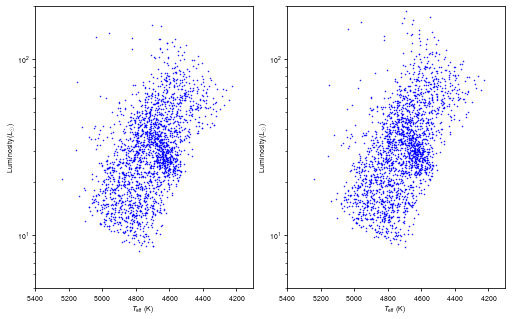

In [43]:
fig, axes = plt.subplots(figsize=mnras_size(column='double'), nrows=1, ncols=2, squeeze=False, constrained_layout=True)
axes = axes.reshape(-1)


axes[0].scatter(sample['teff'], sample['Rseis']**2.*(sample['teff']/5777)**4, marker='.', c='b', s=1)
axes[1].scatter(sample['teff'], sample['inv_r_gaia_K_MIST']**-2.*(sample['teff']/5777)**4, marker='.', c='b', s=1)

# sample['Rseis'], sample['Rseis_m']*sample['inv_r_gaia_K_MIST']-1


for iax in range(2):
    axes[iax].set_xlabel('$T_{\\rm eff}$ (K)')
    axes[iax].set_ylabel('Luminosity ($L_{\\odot}$)')
    axes[iax].set_yscale('log')
    axes[iax].set_xlim(5400,4100)
    axes[iax].set_ylim(5, 200)
    
filename = 'Gaia_Seis_RGB_HRD.pdf'
plt.savefig(filename)